In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns = None

#Add separation lines in graphs
plt.rcParams["patch.force_edgecolor"] = True

#SciPy
from scipy import stats, spatial

#Sklearn
from sklearn import svm
from sklearn import model_selection
from sklearn import tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, ElasticNet,BayesianRidge, ElasticNetCV,LogisticRegression, SGDClassifier,RidgeClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score, learning_curve,GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
import lightgbm as lgbm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the data
df = pd.read_csv("adult.data",1,",")

In [3]:
df.head(5)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


We are obviosuly seeing that our data is missing its headers so i have to fill them up manually

In [4]:
#filling the column names by searching the nature of our dataset
cln=["age","workclass","fnlwgt","education","educational-num","marital-status","occupation","relationship","race","gender","capital-gain","capital-loss","hours-per-week","native-country","income"]
#rereading the data with the proper column names this time
df = pd.read_csv("adult.data", names=cln, header=None)

In [5]:
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                32561 non-null int64
workclass          32561 non-null object
fnlwgt             32561 non-null int64
education          32561 non-null object
educational-num    32561 non-null int64
marital-status     32561 non-null object
occupation         32561 non-null object
relationship       32561 non-null object
race               32561 non-null object
gender             32561 non-null object
capital-gain       32561 non-null int64
capital-loss       32561 non-null int64
hours-per-week     32561 non-null int64
native-country     32561 non-null object
income             32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
(32561, 15)


We can see there are 32561 rows and 15 columns. Some of the variables are continous and while others are categorical.

In [7]:

print('## 1.4. Missing values')
for i,j in zip(df.columns,(df.values.astype(str) == ' ?').sum(axis = 0)):
    if j > 0:
        print(str(i) + ': ' + str(j) + ' records')

## 1.4. Missing values
workclass: 1836 records
occupation: 1843 records
native-country: 583 records


We will fix them later

__Correlation Matrix__

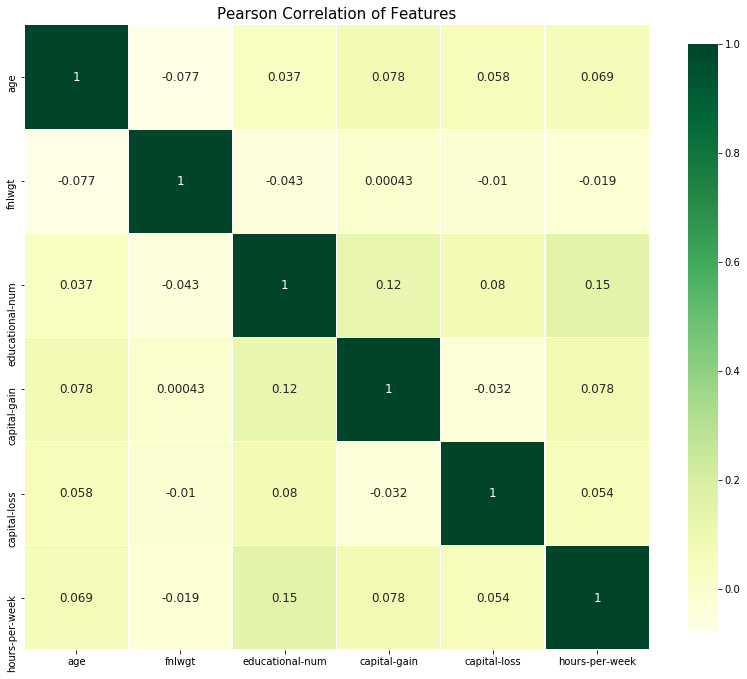

In [8]:
#correlation heatmap of dataset

def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

Things aren't looking that good right now
We can see some Correlation between Age and Workhours and Education
Fnlwgt  is a useless feature


__Pair-plots of the variables__

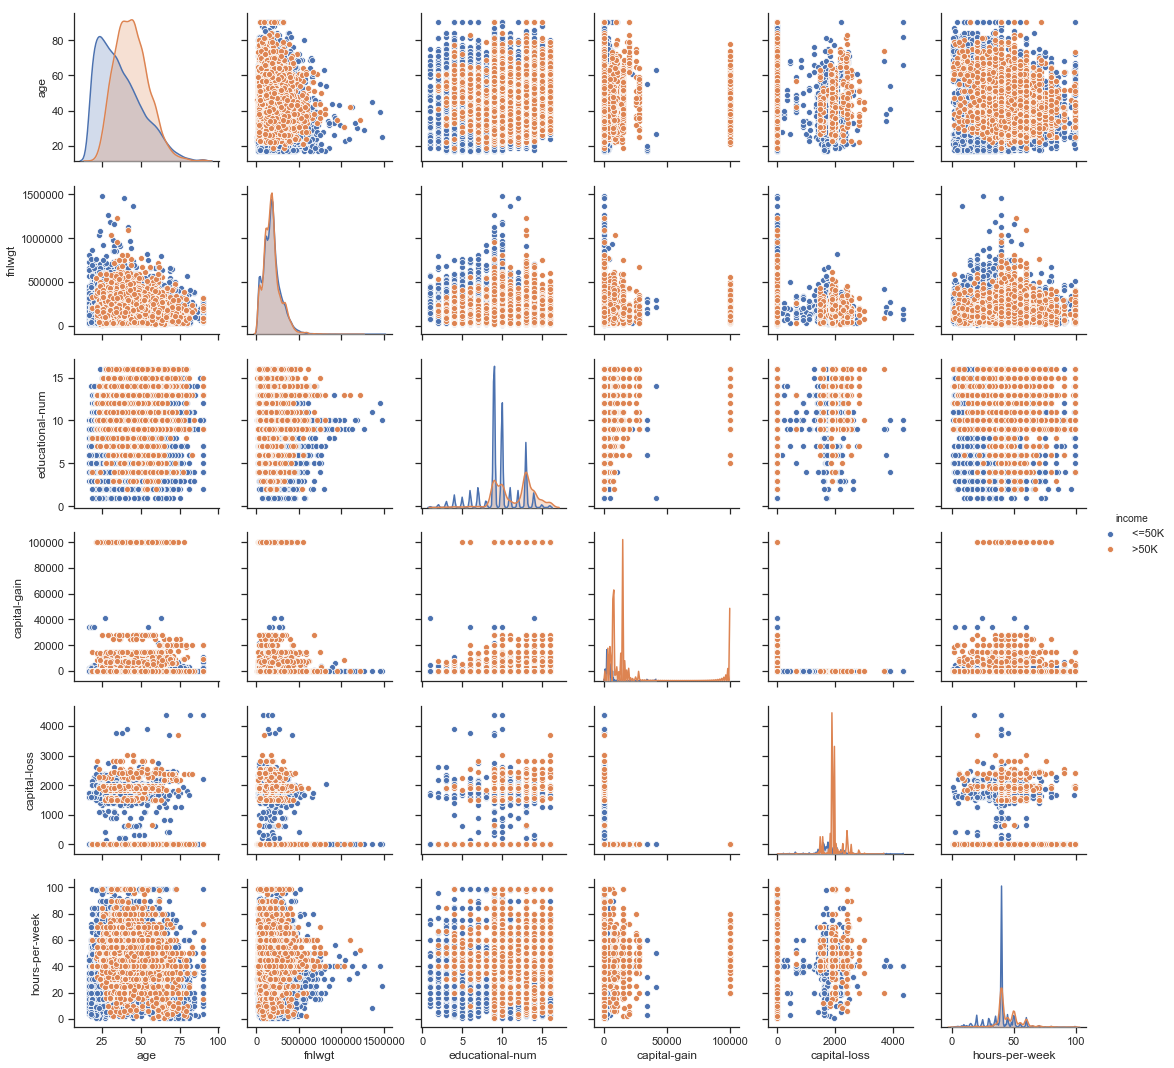

In [9]:
sns.set(style="ticks")
sns.pairplot(df, hue="income")
plt.show()

__Plot of the counts__

[]

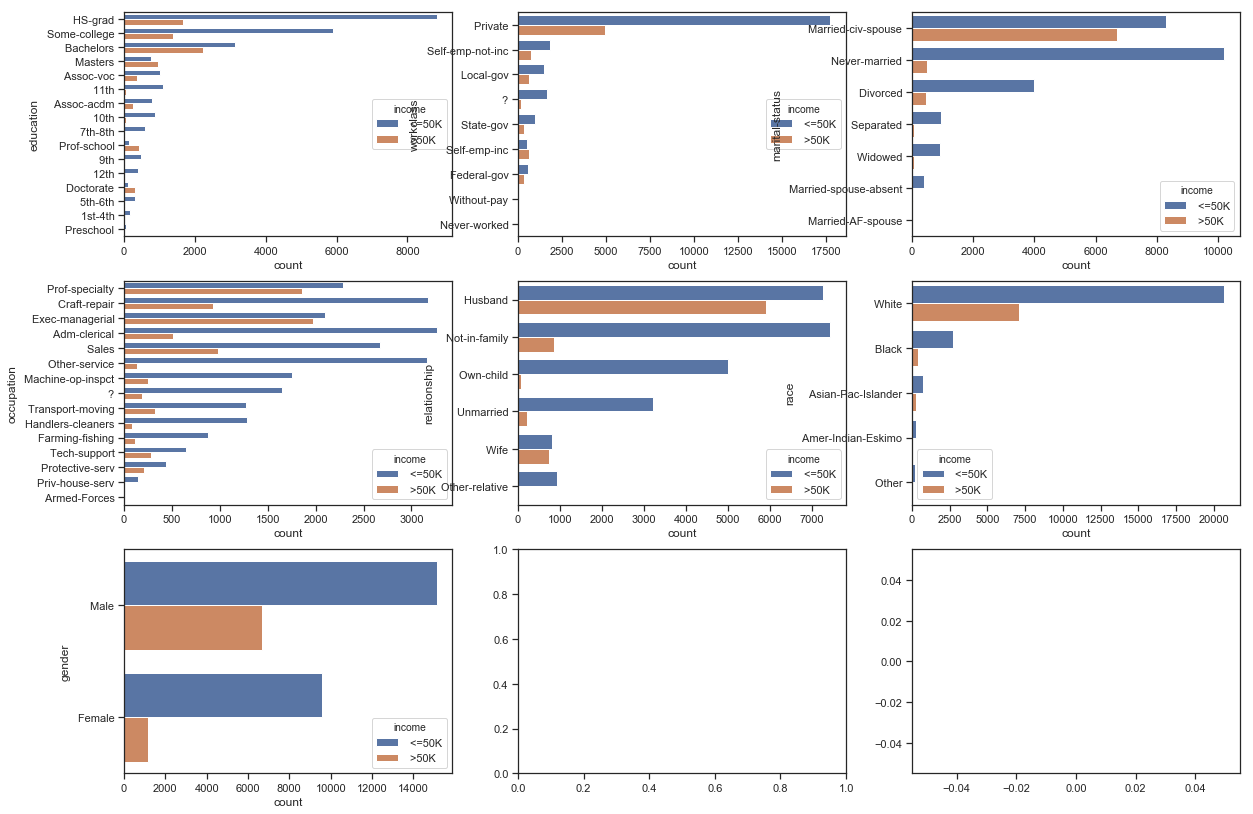

In [10]:
tcp = ['education','workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender']
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20,14))
[sns.countplot(y=feature, hue='income', data=df, order=df[feature].value_counts().index , ax=axs.flatten()[idx]) for idx, feature in enumerate(tcp)]
plt.plot()

Text(0, 0.5, 'Proportion of population')

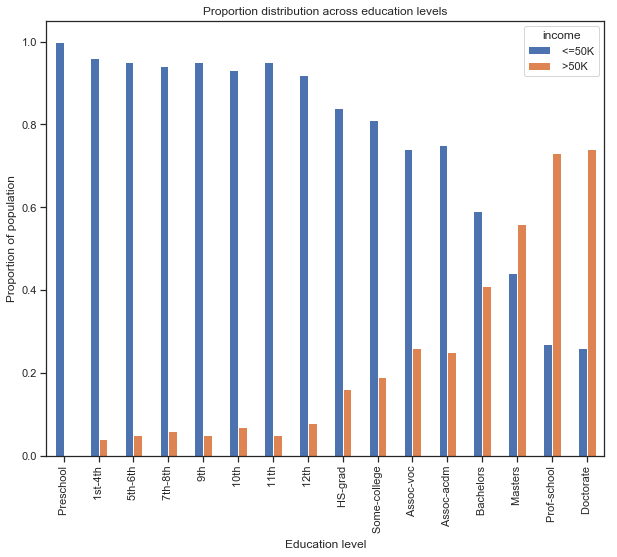

In [11]:
## Creating a dictionary that contain the education and it's corresponding education level
edu_level = {}
for x,y in df[['educational-num','education']].drop_duplicates().itertuples(index=False):
    edu_level[y] = x
    

education = round(pd.crosstab(df.education, df.income).div(pd.crosstab(df.education, df.income).apply(sum,1),0),2)
education = education.reindex(sorted(edu_level, key=edu_level.get, reverse=False))

ax = education.plot(kind ='bar', title = 'Proportion distribution across education levels', figsize = (10,8))
ax.set_xlabel('Education level')
ax.set_ylabel('Proportion of population')

We see from the bar graph below that as the education level increase, the proportion of people who earn more than 50k a year also increase. It is interesting to note that only after a master's degree, the proportion of people earning more than 50k a year, is a majority.

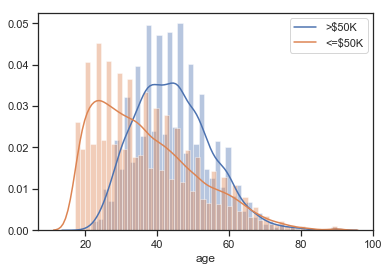

In [12]:
#age and Income plot
sns.distplot(df[df['income'] == ' >50K']['age'], kde_kws={"label": ">$50K"})
sns.distplot(df[df['income'] == ' <=50K']['age'], kde_kws={"label": "<=$50K"})

Text(0, 0.5, 'Proportion of population')

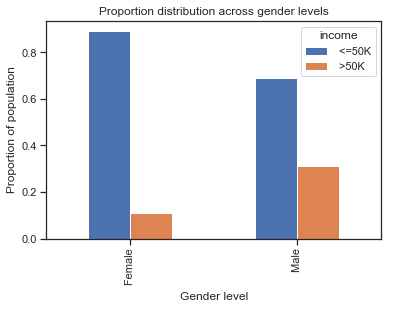

In [13]:
#gender and income
gender = round(pd.crosstab(df.gender, df.income).div(pd.crosstab(df.gender, df.income).apply(sum,1),0),2)

ax = gender.plot(kind ='bar', title = 'Proportion distribution across gender levels')
ax.set_xlabel('Gender level')
ax.set_ylabel('Proportion of population')

We observe that the proportion of males earning more than 50k a year is more than double of their female counterparts.

Text(0, 0.5, 'Proportion of population')

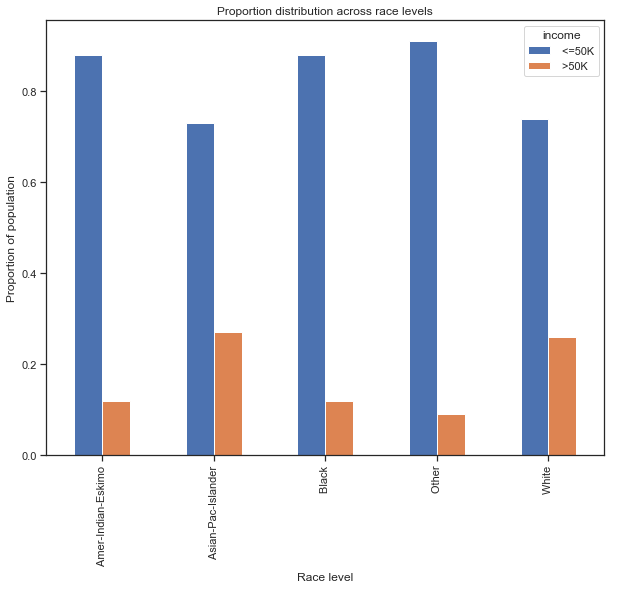

In [14]:
## 2.5. Race vs Income'

race = round(pd.crosstab(df.race, df.income).div(pd.crosstab(df.race, df.income).apply(sum,1),0),2)

ax = race.plot(kind ='bar', title = 'Proportion distribution across race levels', figsize = (10,8))
ax.set_xlabel('Race level')
ax.set_ylabel('Proportion of population')

We see that Asians and Whites have the most people with income over 50k.

Text(0, 0.5, 'Proportion of population')

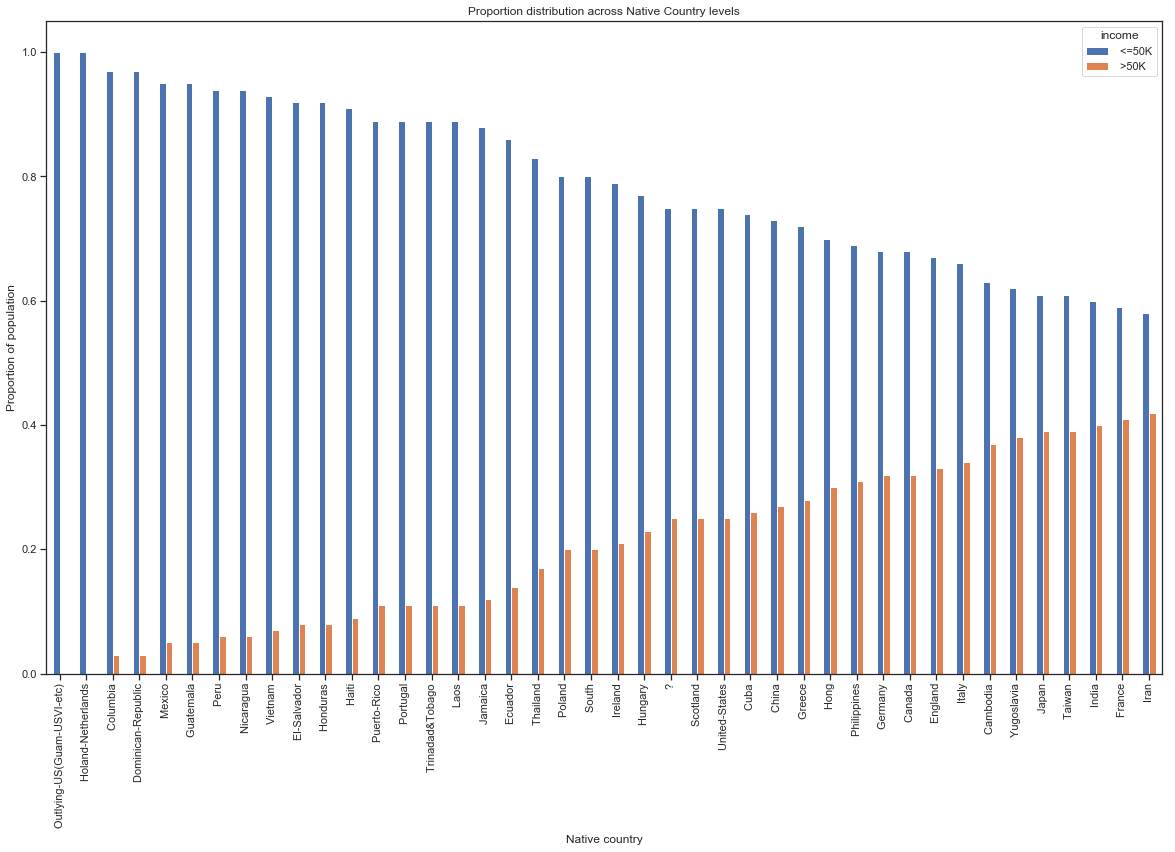

In [15]:
#Native Country vs Income
native_country = round(pd.crosstab(df['native-country'], df.income).div(pd.crosstab(df['native-country'], df.income).apply(sum,1),0),2)
native_country.sort_values(by = ' >50K', inplace = True)
ax = native_country.plot(kind ='bar', title = 'Proportion distribution across Native Country levels', figsize = (20,12))
ax.set_xlabel('Native country')
ax.set_ylabel('Proportion of population')

We see a pattern
South American country are at the left end of the plot, with low proportion of population that make more than 50k a year. The United States is located somewhat centrally, and at the right are countries from Europe and Asia, with higher proportion of population that make more than 50k a year.

__Feature Engineering_

In [16]:
#Education and education_num might be the same thing. Let's check
df[['education', 'educational-num']].groupby(['education'], as_index=False).mean().sort_values(by='educational-num', ascending=False)

,education,educational-num
10,Doctorate,16
14,Prof-school,15
12,Masters,14
9,Bachelors,13
7,Assoc-acdm,12
8,Assoc-voc,11
15,Some-college,10
11,HS-grad,9
2,12th,8
1,11th,7


Split into test and Data. We have to do this before One Hot Encoding otherwise the normalization and encodings would know about the values and classes

In [17]:
#fixes a type bug and let's us use .strip
df['income'] = df['income'].astype('str')
#converts Income to True if >50k and False if <=50k
df.income = df.income.apply(lambda el: el.strip() == ">50K")
y = df.income

In [18]:
data = df.copy()
df.drop(columns=['income','fnlwgt', 'education'], inplace=True)

#data with income removed
X = df.copy()
print(X.shape, y.shape)

validation_size = 0.25
seed = 123
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

(32561, 12) (32561,)


In [19]:
X_train.head(), len(X_train), len(X_test)

(       age          workclass  educational-num       marital-status  \
 6955    27            Private               10        Never-married   
 5054    21            Private                9        Never-married   
 8568    45            Private                5   Married-civ-spouse   
 7830    31            Private                9   Married-civ-spouse   
 22532   56   Self-emp-not-inc                9   Married-civ-spouse   
 
               occupation    relationship    race   gender  capital-gain  \
 6955        Tech-support   Not-in-family   White   Female             0   
 5054        Craft-repair       Own-child   White     Male           594   
 8568    Transport-moving         Husband   White     Male             0   
 7830        Craft-repair         Husband   White     Male             0   
 22532       Craft-repair         Husband   White     Male             0   
 
        capital-loss  hours-per-week  native-country  
 6955              0              30   United-States 

__We have to encode Male and Female into binary values__

In [20]:
#Label Encoding
LE_train = LabelEncoder()
LE_train.fit(X_train['gender'])

X_train.loc[:, 'gender'] = LE_train.transform(X_train.loc[:, 'gender'])
X_test.loc[:, 'gender'] = LE_train.fit_transform(X_test.loc[:, 'gender'])

print(LE_train.classes_)

[' Female' ' Male']


__I decided to encode Born in US as 1 and The Rest of the World as 0__

In [21]:
#Research shows that being a native impacts the  income
X_train['native-country'] = X_train['native-country'].apply(lambda el: 1 if el.strip() == "United-States" else 0)
X_test['native-country'] = X_test['native-country'].apply(lambda el: 1 if el.strip() == "United-States" else 0)
X_train.isnull().values.any(), X_test.isnull().values.any(), len(X_train), X_train['marital-status'].isnull().values.sum()

(False, False, 24420, 0)

__Encoding the rest of the Categorical columns into binary__

In [22]:
ctb = ['marital-status', 'occupation', 'relationship', 'race', 'workclass']

stb = []
for col in ctb:
  lb = LabelBinarizer()
  lb_fitted = lb.fit(X_train[col])
  stb.append(lb_fitted)

#our binarizer class only knows what's in the training data
for b in stb:
  print(b.classes_)

for i, val in enumerate(ctb):
  print(X_train[val].head())

[' Divorced' ' Married-AF-spouse' ' Married-civ-spouse'
 ' Married-spouse-absent' ' Never-married' ' Separated' ' Widowed']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']
[' Husband' ' Not-in-family' ' Other-relative' ' Own-child' ' Unmarried'
 ' Wife']
[' Amer-Indian-Eskimo' ' Asian-Pac-Islander' ' Black' ' Other' ' White']
[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
6955           Never-married
5054           Never-married
8568      Married-civ-spouse
7830      Married-civ-spouse
22532     Married-civ-spouse
Name: marital-status, dtype: object
6955          Tech-support
5054          Craft-repair
8568      Transport-moving
7830          Craft-repair
22532         Craft-repair
Name: occupation, dty

In [23]:
def replaceWithBinarized_legit(dataframe, column_names, stored_binarizers):
  newDf = dataframe.copy()
  for idx, column_name in enumerate(column_names):
    if (not column_name in newDf):
      return
    
    lb = stored_binarizers[idx]
    lb_results = lb.transform(newDf[column_name])
    binarized_cols = pd.DataFrame(lb_results, columns=lb.classes_)

    newDf.drop(columns=column_name, inplace=True)
    
    binarized_cols.index = newDf.index
    
    newDf = pd.concat([newDf, binarized_cols], axis=1)
  return newDf

X_train = replaceWithBinarized_legit(X_train, ctb, stb)
X_test = replaceWithBinarized_legit(X_test, ctb, stb)

X_train.head()

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,native-country,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
6955,27,10,0,0,0,30,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
5054,21,9,1,594,0,40,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
8568,45,5,1,0,0,40,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
7830,31,9,1,0,0,43,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
22532,56,9,1,0,0,55,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


__I will use StandardScaler and RobustScaler to handle values between -1 and 1__

In [24]:
cts= ['hours-per-week', 'age', 'educational-num']
standardSc = StandardScaler()
standardSc.fit(X_train[cts])

ctsb = ['capital-gain', 'capital-loss']
robustSc = RobustScaler()
robustSc.fit(X_train[ctsb])

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)

In [25]:
def scale_columns_legit(df, column_names, scaler):
  d = df.copy()
  for column_name in column_names:
    if (not column_name in d.columns):
      return
  
  scaled_array = scaler.transform(d[column_names])
  scaled_df = pd.DataFrame(scaled_array, columns=column_names)
  scaled_df.index = d.index
  d.drop(columns=column_names, inplace=True)
  return pd.concat([d, scaled_df], axis=1)




X_train = scale_columns_legit(X_train, cts, standardSc)
X_train = scale_columns_legit(X_train, ctsb, robustSc)

X_test = scale_columns_legit(X_test, cts, standardSc)
X_test = scale_columns_legit(X_test, ctsb, robustSc)

X_train.head()

,gender,native-country,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,hours-per-week,age,educational-num,capital-gain,capital-loss
6955,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,-0.851499,-0.848703,-0.034737,0.0,0.0
5054,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,-0.039271,-1.289199,-0.421907,594.0,0.0
8568,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,-0.039271,0.472784,-1.970585,0.0,0.0
7830,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0.204397,-0.555039,-0.421907,0.0,0.0
22532,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1.179071,1.280360,-0.421907,0.0,0.0


In [26]:
#checking if all columns are numeric
len(X_train.columns), len(X_train._get_numeric_data().columns)

(49, 49)

In [27]:
X_train.columns

Index(['gender', 'native-country', ' Divorced', ' Married-AF-spouse',
       ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married',
       ' Separated', ' Widowed', ' ?', ' Adm-clerical', ' Armed-Forces',
       ' Craft-repair', ' Exec-managerial', ' Farming-fishing',
       ' Handlers-cleaners', ' Machine-op-inspct', ' Other-service',
       ' Priv-house-serv', ' Prof-specialty', ' Protective-serv', ' Sales',
       ' Tech-support', ' Transport-moving', ' Husband', ' Not-in-family',
       ' Other-relative', ' Own-child', ' Unmarried', ' Wife',
       ' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White', ' ?', ' Federal-gov', ' Local-gov', ' Never-worked',
       ' Private', ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov',
       ' Without-pay', 'hours-per-week', 'age', 'educational-num',
       'capital-gain', 'capital-loss'],
      dtype='object')

In [28]:
#we see the damned ? symbol so we might have to impute it
X_train = X_train.drop(columns=[" ?"], axis=1)
X_test = X_test.drop(columns=[" ?"], axis=1)

In [29]:
scoring = 'accuracy'
models = []
#we create a list of the models in order to compare their performance
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=11)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('XGB', XGBClassifier(max_depth=7, n_estimators=250, learning_rate=0.1)))
models.append(('GB', GradientBoostingClassifier(n_estimators= 100, max_depth= 7, learning_rate=0.1)))
models.append(('SGD', SGDClassifier()))
models.append(('RF', RandomForestClassifier(n_jobs=-1)))
models.append(('ADA',AdaBoostClassifier(n_estimators=100)  ))


In [30]:
results = []
names = []
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=seed)
  cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.849304 (0.006399)
LDA: 0.839599 (0.007419)
KNN: 0.864087 (0.005827)
CART: 0.817445 (0.007040)
NB: 0.803726 (0.005609)
XGB: 0.872318 (0.005883)
GB: 0.871785 (0.006416)
SGD: 0.802539 (0.009038)
RF: 0.841769 (0.006781)
ADA: 0.865070 (0.007542)


In [31]:
#We use the 2 best models to Try to predict in order to find their actual performance
gb = GradientBoostingClassifier(n_estimators= 100, max_depth= 7, learning_rate=0.1)
gb.fit(X_train, Y_train)
gb_predictions = gb.predict(X_test)
print('Accuracy GB score:\n',accuracy_score(Y_test, gb_predictions))
print(confusion_matrix(Y_test, gb_predictions))
print(classification_report(Y_test, gb_predictions))
print('F1 GB score:\n', metrics.f1_score(Y_test, gb_predictions))

Accuracy GB score:
 0.8728657413094214
[[5793  372]
 [ 663 1313]]
              precision    recall  f1-score   support

       False       0.90      0.94      0.92      6165
        True       0.78      0.66      0.72      1976

   micro avg       0.87      0.87      0.87      8141
   macro avg       0.84      0.80      0.82      8141
weighted avg       0.87      0.87      0.87      8141

F1 GB score:
 0.7172903578257307


In [32]:
xgb = XGBClassifier(max_depth=7, n_estimators=250, learning_rate=0.1)
xgb.fit(X_train, Y_train)
xgb_predictions = xgb.predict(X_test)
print('Accuracy XGB score:\n',accuracy_score(Y_test, xgb_predictions))
print(confusion_matrix(Y_test, xgb_predictions))
print(classification_report(Y_test, xgb_predictions))
print('F1 XGB score:\n', metrics.f1_score(Y_test,xgb_predictions))

Accuracy XGB score:
 0.8720058960815624
[[5799  366]
 [ 676 1300]]
              precision    recall  f1-score   support

       False       0.90      0.94      0.92      6165
        True       0.78      0.66      0.71      1976

   micro avg       0.87      0.87      0.87      8141
   macro avg       0.84      0.80      0.82      8141
weighted avg       0.87      0.87      0.87      8141

F1 XGB score:
 0.7138934651290499


Since we made every categorical variable into a new column we can see the impact that it has in the Gradient Boost Model

Text(0, 0.5, 'Feature Importance Score')

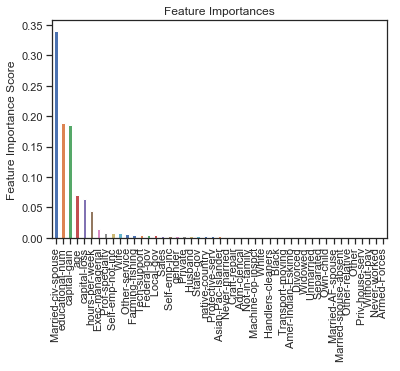

In [33]:
feat_imp = pd.Series(gb.feature_importances_, X_test.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')